<a href="https://colab.research.google.com/github/MabelOlivia/Machine-Learning/blob/master/Hypothesis%20Testing/Chi_Square_Test_Implementation_with_Python_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chi Square Test Implementation with Python- Hypothesis Testing

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
df = sns.load_dataset("tips")

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


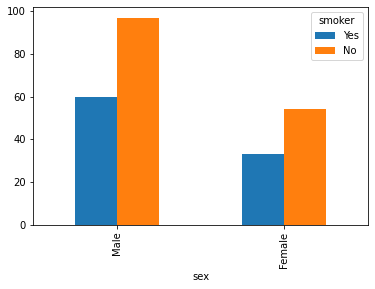

In [5]:
pd.crosstab(df.sex, df.smoker).plot(kind = "bar")

In [6]:
import scipy.stats as stats

In [8]:
dataset_table = pd.crosstab(df.sex, df.smoker)

In [9]:
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [10]:
observerd_values = dataset_table.values
observerd_values

array([[60, 97],
       [33, 54]])

In [11]:
val = stats.chi2_contingency(dataset_table)
val

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [12]:
expected_values = val[3]

In [14]:
shape = dataset_table.shape

In [15]:
no_of_rows = shape[0]
no_of_columns = shape[1]

In [16]:
degree_of_freedom = (no_of_rows-1) * (no_of_columns - 1)
degree_of_freedom

1

In [17]:
# set alpha 
alpha = 0.05

In [19]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observerd_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [27]:
chi_square

array([0.00119737, 0.00073745])

In [21]:
zipp = zip(observerd_values,expected_values)

In [23]:
print(tuple(zipp))

((array([60, 97]), array([59.84016393, 97.15983607])), (array([33, 54]), array([33.15983607, 53.84016393])))


In [26]:
for o,e in zip(observerd_values,expected_values):
  print(o)
  print(e)

[60 97]
[59.84016393 97.15983607]
[33 54]
[33.15983607 53.84016393]


In [28]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [30]:
critical_value=chi2.ppf(q=1-alpha,df=degree_of_freedom)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [31]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=degree_of_freedom)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',degree_of_freedom)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [32]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
